___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

![image.png](https://i.ibb.co/4PP9w2m/plotly-logo.png)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Interactive Plots with Plotly </p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 06 (Plotly)</p>

Plotly Express is a new Python visualization library that acts as a wrapper for Plotly, exposing a simple syntax for complex charts. It was inspired by Seaborn and ggplot2 and was specifically designed to have a terse, consistent, and easy-to-learn API: with a single import, you can make richly interactive plots with faceting, maps, animations, and trendlines in a single function call. 

Plotly Express includes over 30 functions for creating various types of figures. The API for these functions was carefully designed to be as consistent and easy to learn as possible, allowing you to easily switch from a scatter plot to a bar chart to a histogram to a sunburst chart during a data exploration session.

Nor are we confined to Plotly Express.  Just as Seaborn sits atop matplotlib, so does Express sit atop plotly which, used directly, is capable of lots of customization, in tandem with Express.

https://www.youtube.com/watch?v=GGL6U0k8WYA 

Derek Banas has a truly excellent tutorial, but he doesn't have time to talk much about some of what he imports or why.  

Will the Jupyter configuration also work in Colab?  Not without modifications.  Check out Binder.

Is the opening exactly the same if working in Anaconda?

We also now have Dash, ploty's flagship product.  The enterprise version costs something, but if you just want to test the waters...

* [Jupyter Dash on Binder: Getting Started](https://mybinder.org/v2/gh/plotly/jupyter-dash/044acaaecbc60a9b52108b0d03b02ce504a7cce3)
* [Saved Version of this Notebook](https://chart-studio.plotly.com/~pdx4d/1)

In [1]:
import pandas as pd
import numpy as np
import plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [2]:
import plotly.graph_objects as go

The two datasets used here are:

- [Melbourne Housing Snapshot](https://www.kaggle.com/datasets/gunjanpathak/melb-data)
- Superstore Sales Dataset

**[Plotly Official Page](https://plotly.com/python/)**

**[4 Reasons Why Plotly Is The Best Visualization Library](https://towardsdatascience.com/4-reasons-why-plotly-is-the-best-visualization-library-18c27de05b95)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [3]:
# !pip install plotly

In [4]:
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
plotly_data = pd.read_html("https://en.wikipedia.org/wiki/Plotly")
plotly_data[2].head()

Chart Type    Chart Name JavaScript[25] Python[26] R[27] Julia[28]
0  Basic charts  Scatter plot           True       True  True      True
1  Basic charts    Line chart           True       True  True      True
2  Basic charts     Bar chart           True       True  True      True
3  Basic charts     Pie chart           True       True  True      True
4  Basic charts  Bubble chart           True       True  True      True

In [6]:
charts = plotly_data[2]

In [7]:
charts.rename(columns = {"JavaScript[25]":"JavaScript", "Python[26]":"Python", "R[27]":"R", "Julia[28]":"Julia"},
             inplace = True)
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Chart Type  89 non-null     object
 1   Chart Name  89 non-null     object
 2   JavaScript  65 non-null     object
 3   Python      80 non-null     object
 4   R           61 non-null     object
 5   Julia       65 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB


In [8]:
charts.rename(columns = {"Chart Type":"Chart_Type", "Chart Name":"Chart_Name"},
             inplace = True)
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Chart_Type  89 non-null     object
 1   Chart_Name  89 non-null     object
 2   JavaScript  65 non-null     object
 3   Python      80 non-null     object
 4   R           61 non-null     object
 5   Julia       65 non-null     object
dtypes: object(6)
memory usage: 4.3+ KB


In [9]:
charts.head()

Chart_Type    Chart_Name JavaScript Python     R Julia
0  Basic charts  Scatter plot       True   True  True  True
1  Basic charts    Line chart       True   True  True  True
2  Basic charts     Bar chart       True   True  True  True
3  Basic charts     Pie chart       True   True  True  True
4  Basic charts  Bubble chart       True   True  True  True

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">READING THE DATASETS</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Melbourne data is a bit large, for the sake of simplicity, we are taking only 1000 data points from the dataset.

In [10]:
melb = pd.read_csv("melb_data.csv.zip", index_col=0)
melb = melb[0:1000]

In [11]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1293
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         1000 non-null   object 
 1   Address        1000 non-null   object 
 2   Rooms          1000 non-null   int64  
 3   Type           1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Method         1000 non-null   object 
 6   SellerG        1000 non-null   object 
 7   Date           1000 non-null   object 
 8   Distance       1000 non-null   float64
 9   Postcode       1000 non-null   float64
 10  Bedroom2       751 non-null    float64
 11  Bathroom       751 non-null    float64
 12  Car            751 non-null    float64
 13  Landsize       751 non-null    float64
 14  BuildingArea   431 non-null    float64
 15  YearBuilt      478 non-null    float64
 16  CouncilArea    751 non-null    object 
 17  Lattitude      756 non-null    float64
 18  Longtitu

In [12]:
melb.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
1  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
4  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
5  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
6  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
1  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
2  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
4  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
5  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
6  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
1           NaN        NaN       Yarra   -37.7996    144.9984   
2          79.0     1900.0       Yarra   -37.8079    144.9934   
4         150.0     1900.0       Yarra   -37.8093    144.9944   
5           NaN        NaN       Yarra   -37.7969    144.9969   
6         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0  
5  Northern Metropolitan         4019.0  
6  Northern Metropolitan         4019.0

In [13]:
sales = pd.read_csv("Superstore_Sales_Dataset.zip")
sales.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">SCATTER PLOTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Scatterplots are a great way to analyze data distribution and the relation between various data fields. Various trends in data can be analyzed and plotted. Plotting scatter plots with Plotly is very easy. Let us make a scatter plot to understand the data distribution.

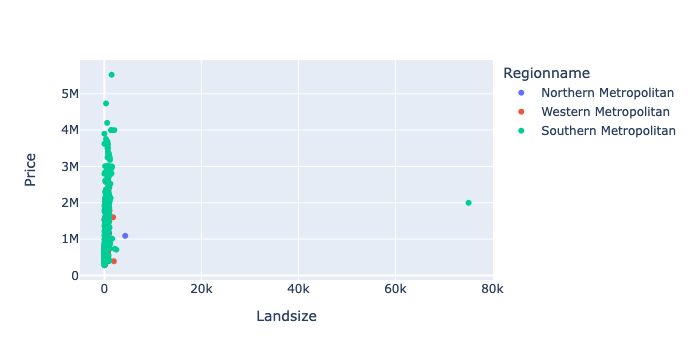

In [15]:
fig = px.scatter(melb, x="Landsize", y="Price", color="Regionname")
fig.show()

In [16]:
melb[melb.Landsize > 70000]

Suburb      Address  Rooms Type      Price Method SellerG  \
1198  Balwyn North  9 Gildan St      3    h  2000000.0     VB     Kay   

            Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
1198  28/08/2016       9.2    3104.0       3.0       1.0  2.0   75100.0   

      BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
1198           NaN        NaN  Boroondara   -37.8002      145.07   

                 Regionname  Propertycount  
1198  Southern Metropolitan         7809.0

In [17]:
melb2 = melb[melb.Landsize < 10000]

We can hover over the plots and see exact data values and other information. 

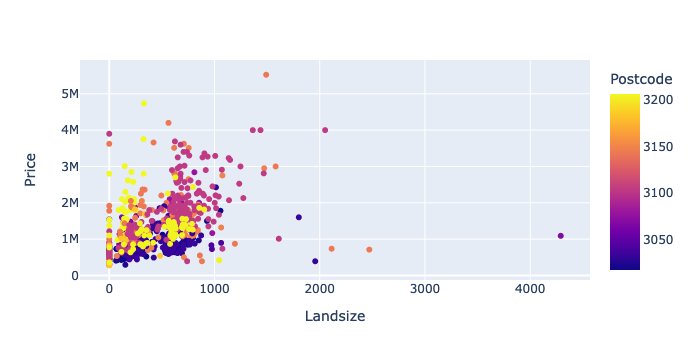

In [18]:
px.scatter(melb2, x="Landsize", y="Price", color='Postcode', hover_data=[melb2.index])

In [19]:
melb.drop(index=1198, inplace=True)

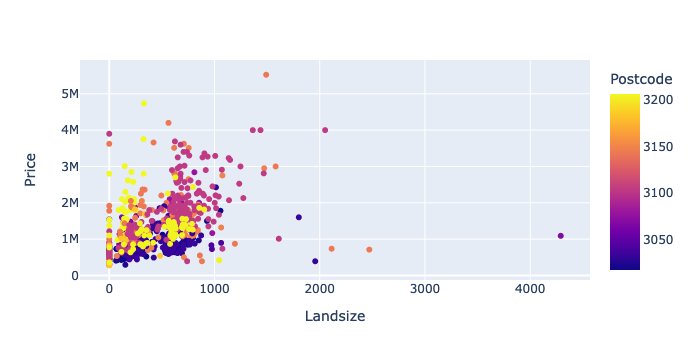

In [20]:
fig = px.scatter(melb, x="Landsize", y="Price", color='Postcode', hover_data=[melb.index])
fig.show()

In [21]:
melb.drop(index=41, inplace=True)

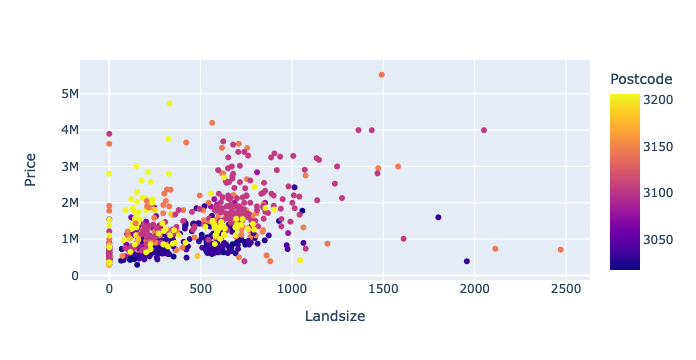

In [22]:
fig = px.scatter(melb, x="Landsize", y="Price", color='Postcode', hover_data=[melb.index])
fig.show()

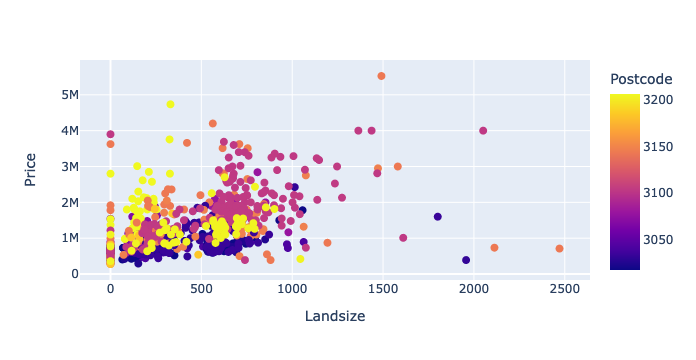

In [23]:
fig = px.scatter(melb, x="Landsize", y="Price", color='Postcode')
fig.update_traces(marker_size=8)

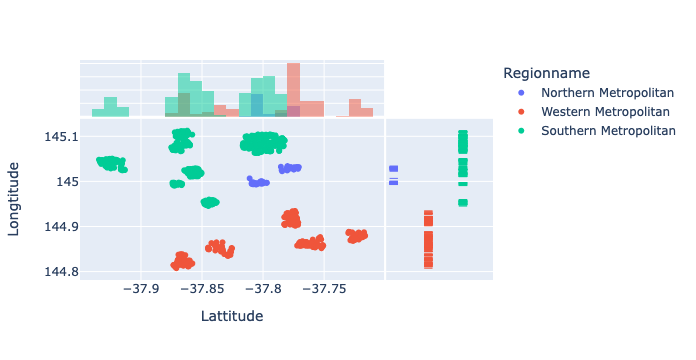

In [24]:
fig = px.scatter(melb, x="Lattitude", y="Longtitude", 
                 marginal_x="histogram", 
                 marginal_y="rug", 
                 color="Regionname")
fig.show()

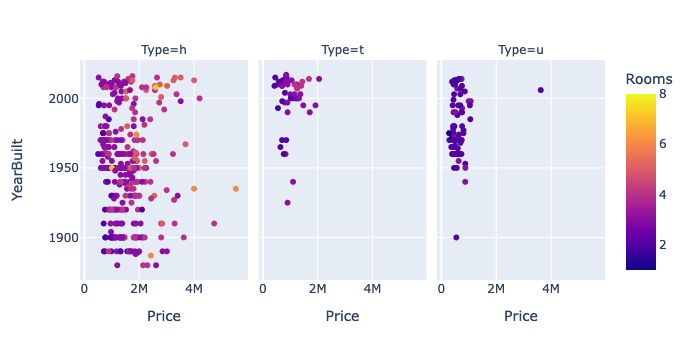

In [25]:
fig = px.scatter(melb, x="Price", y="YearBuilt", color="Rooms", facet_col="Type", )
fig.show()

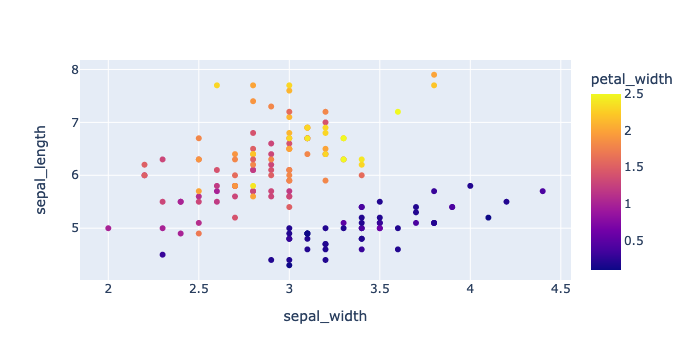

In [26]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color='petal_width')
fig.show()

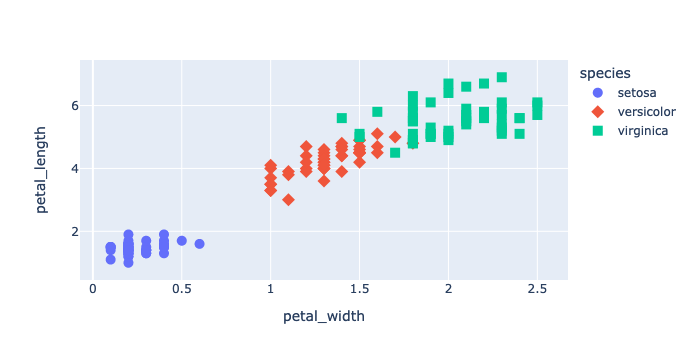

In [27]:
fig = px.scatter(df, y="petal_length", x="petal_width", color="species", symbol="species")
fig.update_traces(marker_size=10)

As seen above, Plotly represents really nice and well designed plots. In addition to scatterplots, Linear Regression plots can be made by using Plotly. Let us plot the linear relationship between total bills and tips in the Tips Dataset.

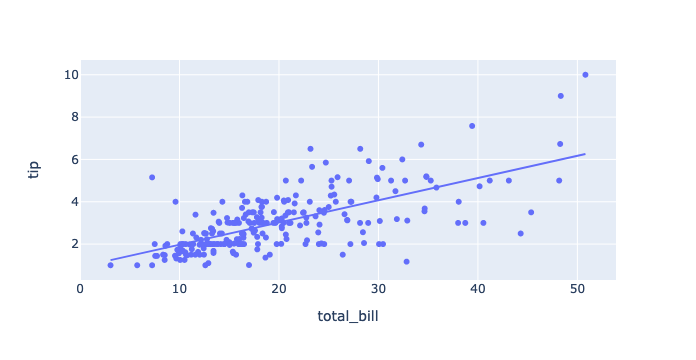

In [28]:
# linear regression

tips = px.data.tips()

fig = px.scatter(tips, x="total_bill", y="tip", trendline="ols")
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">LINE PLOTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Line plots are great in visualizing continuous data. Time series data, mathematical functions etc are some of the data which can be plotted using Line Plots. They reveal data trends, maxima and minima. We can use them for time series data like stocks, sales over time and so on. It is a great way to plot a 2D relationship. Let us make a line plot to understand the data distribution.

In [29]:
df = px.data.stocks()
df.head()

date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
0  2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
1  2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2  2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
3  2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
4  2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708

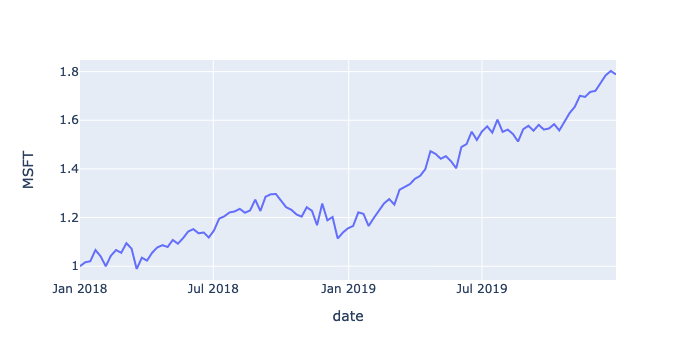

In [30]:
df = px.data.stocks()

fig = px.line(df, x='date', y="MSFT")
fig.show()

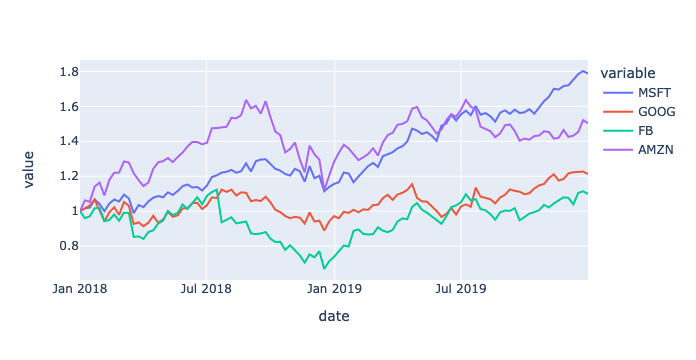

In [31]:
fig = px.line(df, x='date', y=["MSFT","GOOG",'FB',"AMZN"])
fig.show()

In [32]:
df = pd.read_csv("store_sharing.csv")
df.head(3)

timestamp  cnt   t1   t2   hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0  93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5  93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5  96.5         0.0           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [34]:
df.timestamp = pd.to_datetime(df['timestamp'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [36]:
df.set_index('timestamp', inplace=True)
df.head(3)

cnt   t1   t2   hum  wind_speed  weather_code  \
timestamp                                                            
2015-01-04 00:00:00  182  3.0  2.0  93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5  93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5  96.5         0.0           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0

In [37]:
f = lambda x: x.strftime('%Y-%m') # strftime works with array

df['year_month'] = f(df.index)
df['year'] = df.index.year  # only apply to array
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

df.head(3)

cnt   t1   t2   hum  wind_speed  weather_code  \
timestamp                                                            
2015-01-04 00:00:00  182  3.0  2.0  93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5  93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5  96.5         0.0           1.0   

                     is_holiday  is_weekend  season year_month  year  month  \
timestamp                                                                     
2015-01-04 00:00:00         0.0         1.0     3.0    2015-01  2015      1   
2015-01-04 01:00:00         0.0         1.0     3.0    2015-01  2015      1   
2015-01-04 02:00:00         0.0         1.0     3.0    2015-01  2015      1   

                     day_of_month  day_of_week  hour  
timestamp                                             
2015-01-04 00:00:00             4            6     0  
2015-01-04 01:00:00             4            6     1  
2015-01-04 02:00:00             4            6     2

In [38]:
df_month_sum = pd.DataFrame(df.groupby('year_month').cnt.sum())
df_month_sum

cnt
year_month         
2015-01      546639
2015-02      543594
2015-03      695934
2015-04      831582
2015-05      895413
2015-06     1033252
2015-07     1120687
2015-08     1033951
2015-09      892478
2015-10      865046
2015-11      677332
2015-12      602838
2016-01      582518
2016-02      592910
2016-03      656527
2016-04      768845
2016-05     1001935
2016-06      933878
2016-07     1165527
2016-08     1137314
2016-09      998619
2016-10      935706
2016-11      703859
2016-12      651908
2017-01       37680

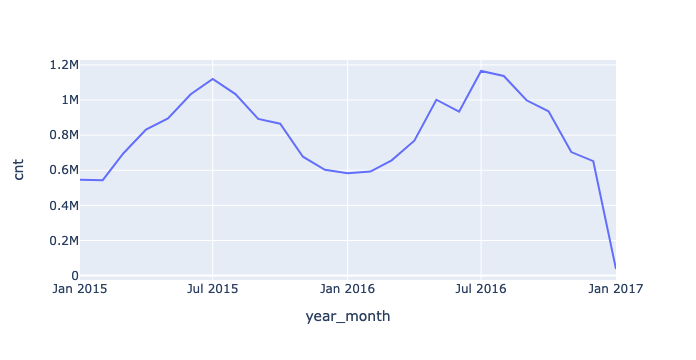

In [39]:
fig = px.line(df_month_sum, x=df_month_sum.index, y='cnt')
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BAR PLOTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A bar chart is a way of summarizing a set of categorical data. The bar chart displays data using a number of bars, each representing a particular category. Barplots are used to provide a straightforward comparison of data. They represent categorical data with rectangular bars of variable height. Plotting bar charts in Plotly is very easy and simple. Let us make a bar plot to understand the data distribution.

In [40]:
melb.head(3)

Suburb          Address  Rooms Type      Price Method SellerG  \
1  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
4  Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
1  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
2  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
4  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
1           NaN        NaN       Yarra   -37.7996    144.9984   
2          79.0     1900.0       Yarra   -37.8079    144.9934   
4         150.0     1900.0       Yarra   -37.8093    144.9944   

              Regionname  Propertycount  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

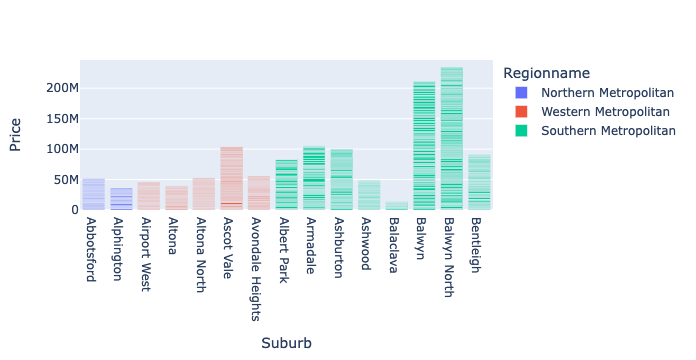

In [41]:
fig = px.bar(melb, x='Suburb', y='Price', color="Regionname")
fig.show()

In [42]:
melb.Method.unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

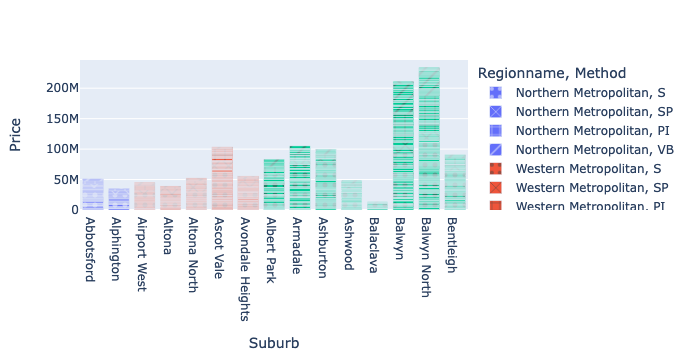

In [43]:
fig = px.bar(melb, 
             x='Suburb', 
             y='Price', 
             color="Regionname", 
             pattern_shape="Method", 
             pattern_shape_sequence=[".", "x", "+", "/", "\\"])
fig.show()

**What is** **[Gapminder](https://www.gapminder.org/)** **& What does it do?**

Gapminder Foundation is an organization dedicated to educating the public by using data to dispel common myths about the so-called developing world. The organization uses **[data](https://www.gapminder.org/data/)** to show how actual trends in health and economics contradict the narratives that emanate from sensationalist media coverage of catastrophes, tragedies, and other unfortunate events.

Its mission is to fight devastating ignorance with a fact-based worldview everyone can understand.

Gapminder identifies systematic misconceptions about important global trends and proportions and uses reliable data to develop easy to understand teaching materials to rid people of their misconceptions.

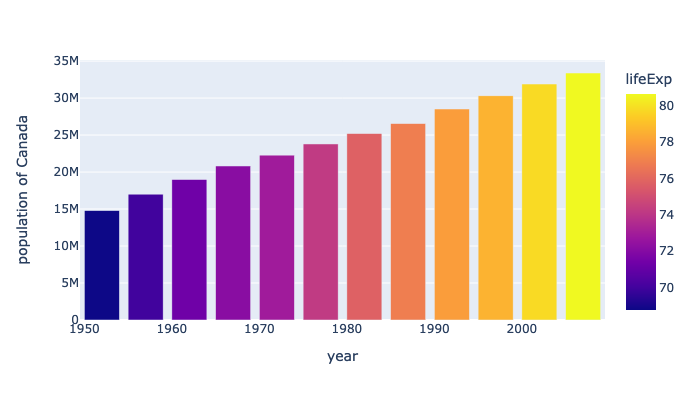

In [44]:
data = px.data.gapminder()
data_canada = data[data.country == 'Canada']

fig = px.bar(data_canada, 
             x='year', 
             y='pop',
             hover_data=['lifeExp', 'gdpPercap'], 
             color='lifeExp',
             labels={'pop':'population of Canada'}, 
             height=400)
fig.show()

In [45]:
df = px.data.gapminder().query("continent == 'Oceania'")
df.head(3)

country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
60  Australia   Oceania  1952    69.12   8691212  10039.59564       AUS   
61  Australia   Oceania  1957    70.33   9712569  10949.64959       AUS   
62  Australia   Oceania  1962    70.93  10794968  12217.22686       AUS   

    iso_num  
60       36  
61       36  
62       36

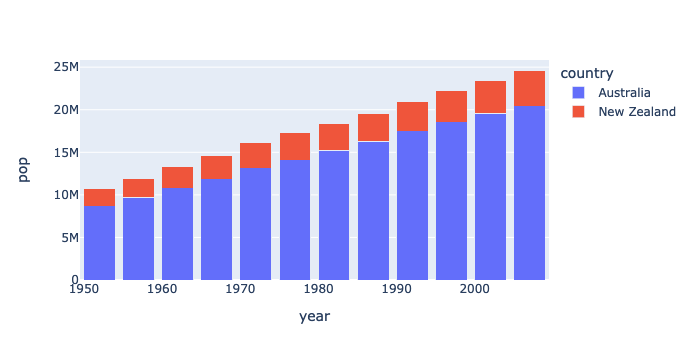

In [46]:
fig = px.bar(df, x='year', y='pop', barmode='stack', color='country')
fig.show()

Stacked bar charts show the summation of individual entries as well the entire plot. So, it is a good way to understand the contribution of each individual factor towards a complete entity.

**Let us plot the populations of the most populous nations in Asia.**

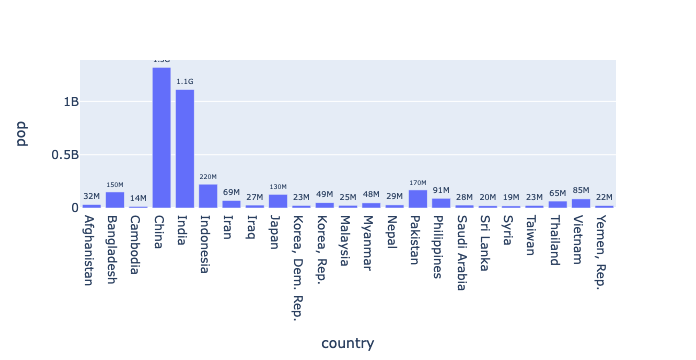

In [47]:
df = px.data.gapminder().query("continent == 'Asia' and year == 2007and pop > 8000000")

fig = px.bar(df, 
             y='pop', 
             x='country', 
             text='pop')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">HORIZONTAL BAR PLOTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Exactly similar to Bar chart, a horizontal bar graph can be created by changing the orientation of the plot. px.bar() has an optional parameter to specify the orientation. To plot a Bar Plot horizontally using Plotly, we can set the orientation argument to h (as opposed to the default v) while plotting the Bar Plot:

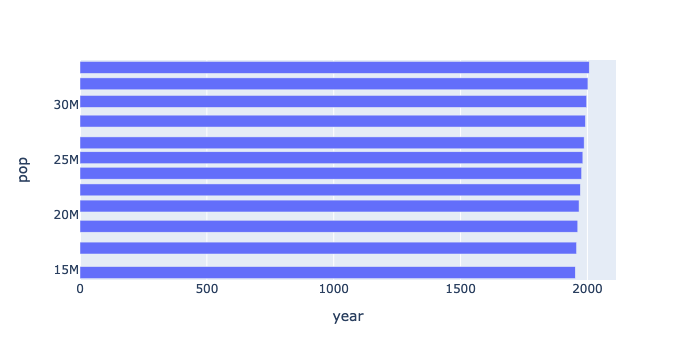

In [48]:
fig = px.bar(data_canada, 
             x='year', 
             y='pop', 
             orientation='h')
fig.show()

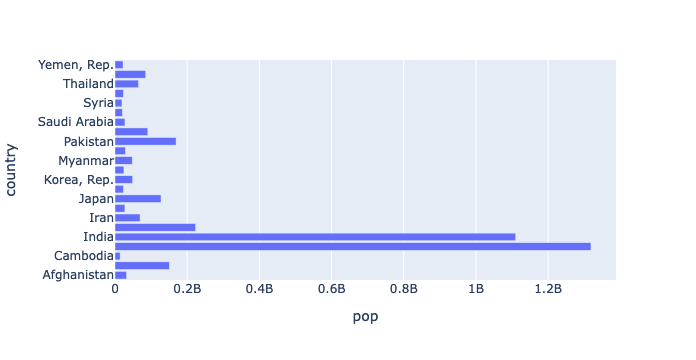

In [49]:
df = px.data.gapminder().query("continent == 'Asia' and year == 2007and pop > 8000000")

fig = px.bar(df, 
             x='pop', 
             y='country')
fig.show()

In [67]:
# ? pd.read_excel

In [51]:
# Telecom Churn Dataset.xls
df = pd.read_csv("https://raw.githubusercontent.com/mmcuri/ds_handson/master/data/telecom/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Electronic check           29.85        29.85    No  
1               No      Mailed check           56.95       1889.5    No  
2              Yes      Mailed check           53.85       108.15   Yes

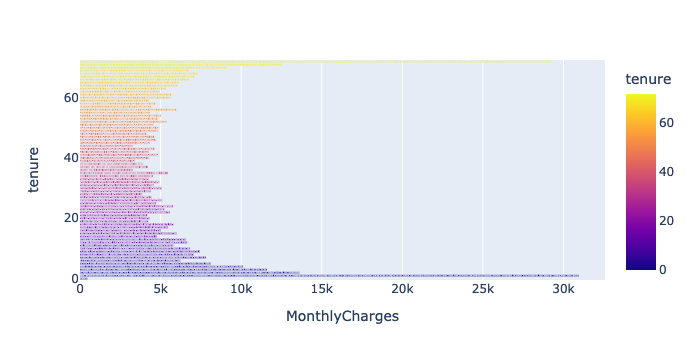

In [52]:
fig = px.bar(df, 
             x='MonthlyCharges', 
             y='tenure', 
             color='tenure', 
             orientation='h')

fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">GANTT CHART WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A Gantt chart is a type of bar chart that illustrates a project schedule. The chart lists the tasks to be performed on the vertical axis, and time intervals on the horizontal axis. The width of the horizontal bars in the graph shows the duration of each activity based on their timelines and progress.

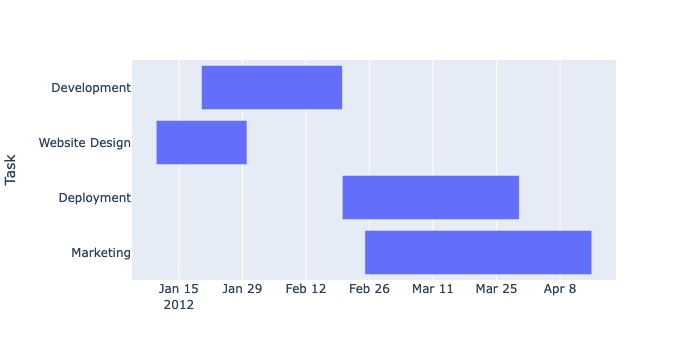

In [53]:
df = pd.DataFrame([
                   dict(Task="Development", Start='2012-01-20', Finish='2012-02-20'),
                   dict(Task="Website Design", Start='2012-01-10', Finish='2012-01-30'),
                   dict(Task="Deployment", Start='2012-02-20', Finish='2012-03-30'),
                   dict(Task="Marketing", Start='2012-02-25', Finish='2012-04-15')
                   ])

fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task")
fig.update_yaxes(autorange="reversed") 
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">PIE CHARTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Pie charts are used to understand the composition of data and analyse part to whole relationships in data. Piecharts ( and doughnut charts) plot the percentage composition of a value, as compared to the entire data/value.

In [54]:
sales.head(3)

Row ID        Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017  Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017  Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017  Second Class    DV-13045   

     Customer Name    Segment        Country         City       State  \
0      Claire Gute   Consumer  United States    Henderson    Kentucky   
1      Claire Gute   Consumer  United States    Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States  Los Angeles  California   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales  
0                  Bush Somerset Collection Bookcase  261.96  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94  
2  Self-Adhesive Address Labels for Typewriters b...   14.62

In [55]:
TotalSales_by_States = sales.groupby("State")["Sales"].sum()
TotalSales_by_States

State
Alabama                  19510.6400
Arizona                  35272.6570
Arkansas                 11678.1300
California              446306.4635
Colorado                 31841.5980
Connecticut              13384.3570
Delaware                 27322.9990
District of Columbia      2865.0200
Florida                  88436.5320
Georgia                  48219.1100
Idaho                     4382.4860
Illinois                 79236.5170
Indiana                  48718.4000
Iowa                      4443.5600
Kansas                    2914.3100
Kentucky                 36458.3900
Louisiana                 9131.0500
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76136.0740
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

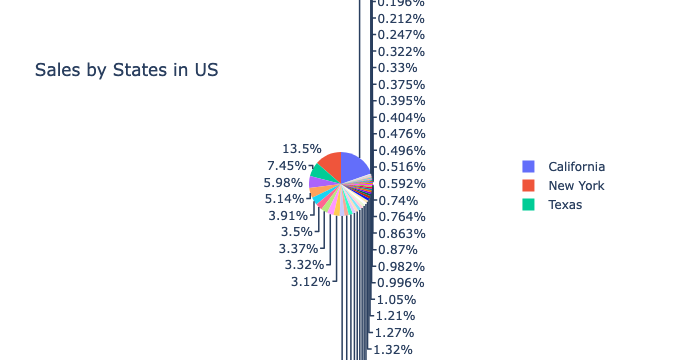

In [56]:
fig = px.pie(TotalSales_by_States, 
             values=TotalSales_by_States.values, 
             names=TotalSales_by_States.index, 
             title='Sales by States in US')
fig.show()

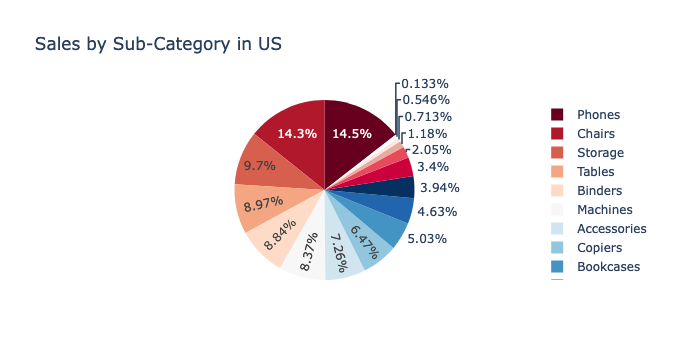

In [57]:
fig = px.pie(sales, 
             values='Sales', 
             names='Sub-Category', 
             title='Sales by Sub-Category in US',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

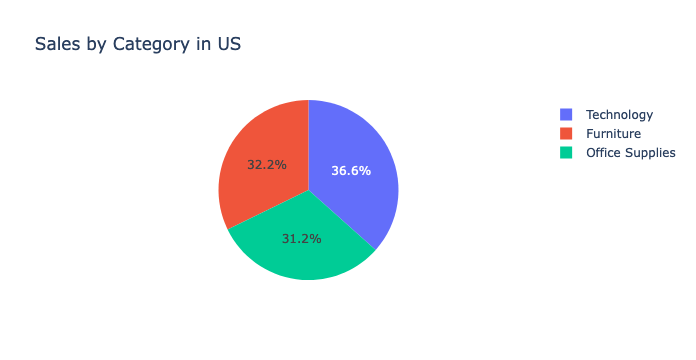

In [58]:
fig = px.pie(sales, 
             values='Sales', 
             names='Category', 
             title='Sales by Category in US')
fig.show()

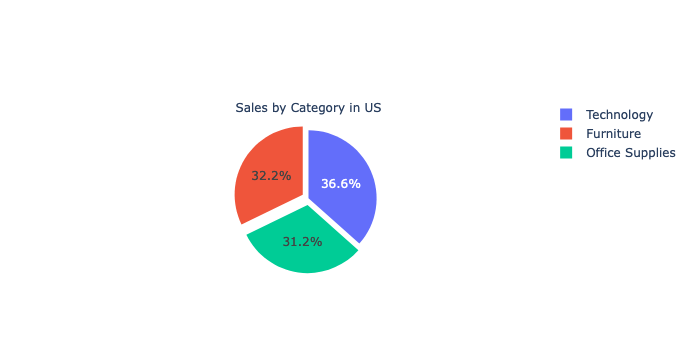

In [59]:
fig = go.Figure(data=[go.Pie(labels=sales['Category'], 
                             values=sales['Sales'], 
                             title='Sales by Category in US', 
                             pull=[0.1, 0.2, 0.1])])
fig.show()

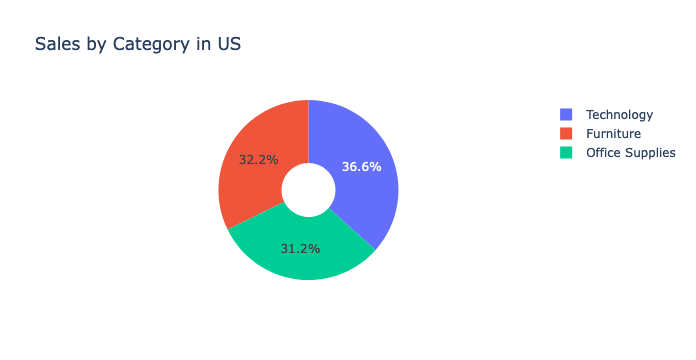

In [60]:
fig = px.pie(sales, 
             values='Sales', 
             names='Category', 
             title='Sales by Category in US', 
             hole=.3)
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BUBBLE CHARTS WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A bubble chart is a scatter plot in which a third dimension of the data is shown through the size of markers. The bubble chart in Plotly is created using the scatter plot. It can be created using the scatter() method of plotly.express. A bubble chart is a data visualization which helps to displays multiple circles (bubbles) in a two-dimensional plot as same in scatter plot. A bubble chart is primarily used to depict and show relationships between numeric variables.

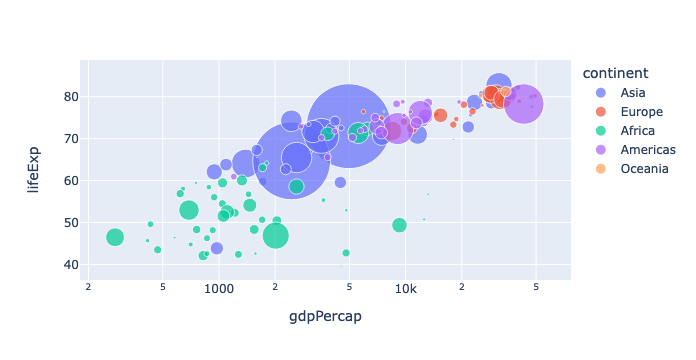

In [61]:
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), 
                 x="gdpPercap", 
                 y="lifeExp",
                 size="pop", 
                 color="continent",
                 hover_name="country", 
                 log_x=True, 
                 size_max=60)
fig.show()

In [62]:
melb.head(3)

Suburb          Address  Rooms Type      Price Method SellerG  \
1  Abbotsford     85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
4  Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
1  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
2  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
4  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
1           NaN        NaN       Yarra   -37.7996    144.9984   
2          79.0     1900.0       Yarra   -37.8079    144.9934   
4         150.0     1900.0       Yarra   -37.8093    144.9944   

              Regionname  Propertycount  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

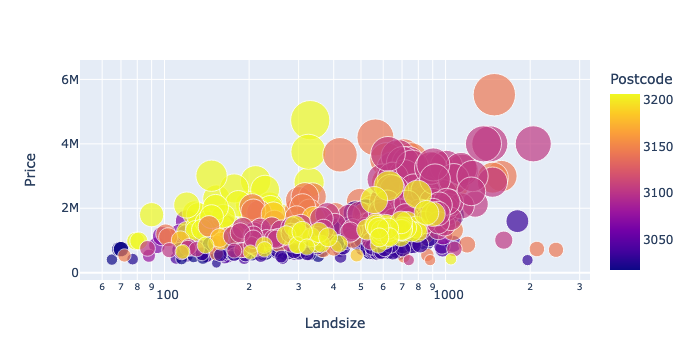

In [63]:
fig = px.scatter(melb, 
                 x="Landsize", 
                 y="Price",
                 size="Price", 
                 color="Postcode",
                 hover_name="Regionname", 
                 log_x=True, 
                 size_max=30)
fig.show()

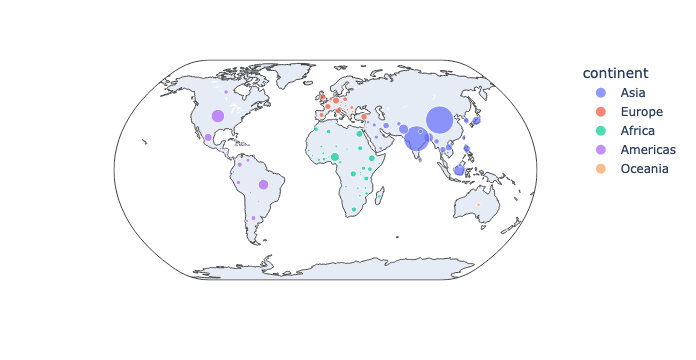

In [64]:
df = px.data.gapminder().query("year==2007")

fig = px.scatter_geo(df, 
                     locations="iso_alpha", 
                     color="continent",
                     hover_name="country", 
                     size="pop",
                     projection="natural earth")
fig.show()

**Bubble Map with animation**

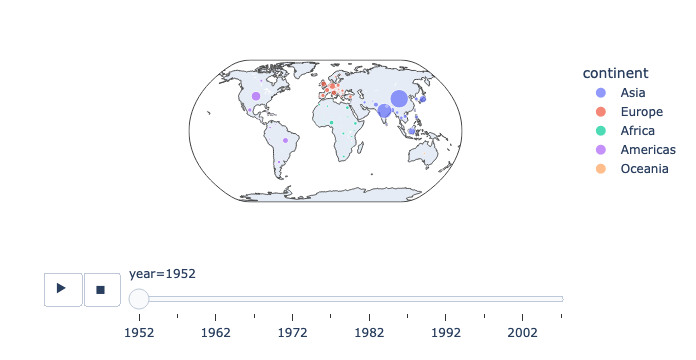

In [65]:
df = px.data.gapminder()

fig = px.scatter_geo(df, 
                     locations="iso_alpha", 
                     color="continent",
                     hover_name="country", 
                     size="pop",
                     animation_frame="year",
                     projection="natural earth")
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BOXPLOT WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A box plot is a statistical representation of the distribution of a variable through its quartiles. The ends of the box represent the lower and upper quartiles, while the median (second quartile) is marked by a line inside the box. For other statistical representations of numerical data.

In [68]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(3)

gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93

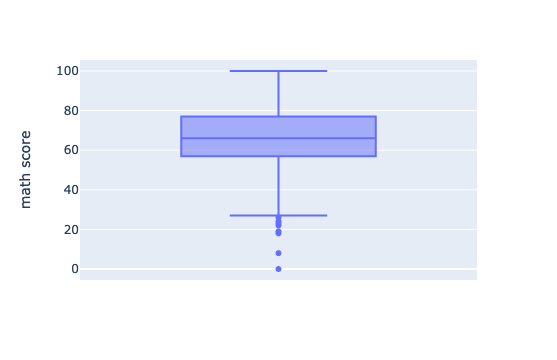

In [69]:
fig = px.box(df, y="math score")
fig.show()

The minimum on a box plot shows the lowest data point except for some of the outliers.

The maximum shows the largest numerical data point.

Median is the middle value of the data distribution.

Then, the lower quartile is the 25 percentile and the upper quartile is the 75 percentile.

Let us try some customised box plots.

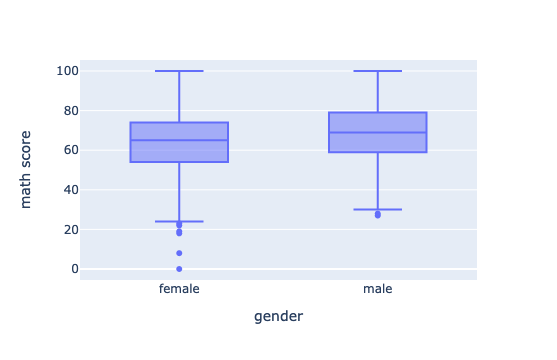

In [70]:
fig = px.box(df, 
             x='gender', 
             y="math score")
fig.show()

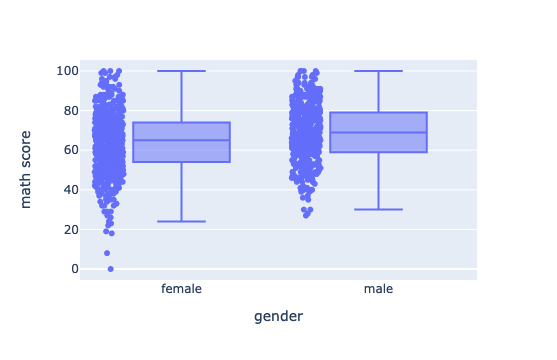

In [71]:
fig = px.box(df, 
             x='gender', 
             y="math score", 
             points="all")
fig.show()

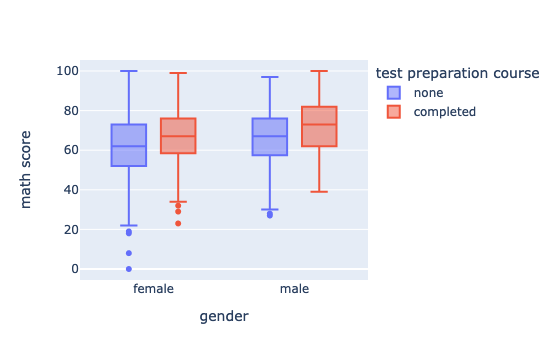

In [72]:
fig = px.box(df, 
             x='gender', 
             y="math score", 
             color="test preparation course")
fig.show()

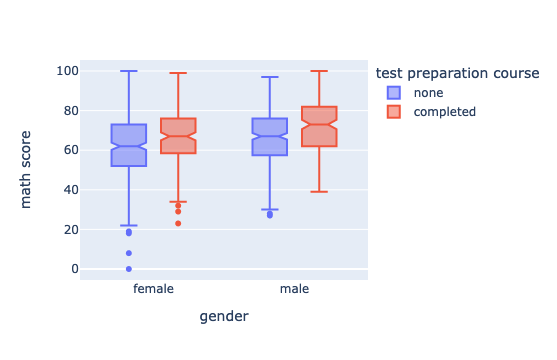

In [73]:
fig = px.box(df, 
             x='gender', 
             y="math score", 
             color="test preparation course", 
             notched=True)
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">HISTOGRAM WITH PLOTLY</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In statistics, a histogram is representation of the distribution of numerical data, where the data are binned and the count for each bin is represented. More generally, in Plotly a histogram is an aggregated bar chart, with several possible aggregation functions (e.g. sum, average, count...) which can be used to visualize data on categorical and date axes as well as linear axes.

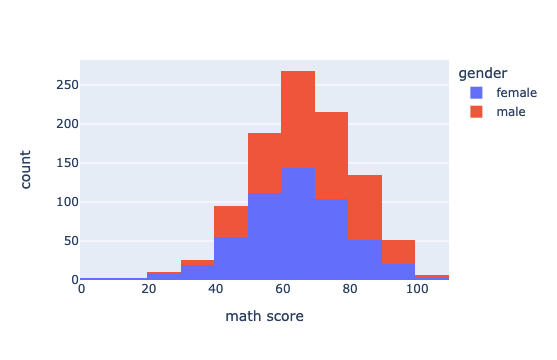

In [74]:
fig = px.histogram(df, 
                   x="math score", 
                   nbins=20, 
                   color="gender")
fig.show()

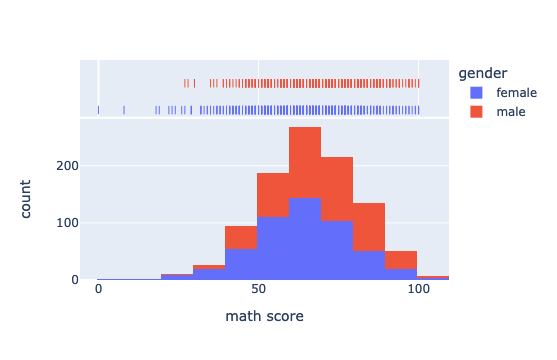

In [75]:
fig = px.histogram(df, 
                   x="math score", 
                   nbins=20, 
                   color="gender", 
                   marginal="rug")
fig.show()

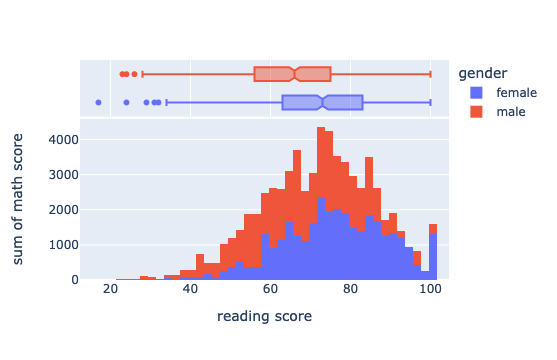

In [76]:
fig = px.histogram(df, 
                   x="reading score", 
                   y="math score", 
                   color="gender", 
                   marginal="box",
                   hover_data=df.columns)
fig.show()

In [ ]:
df.columns

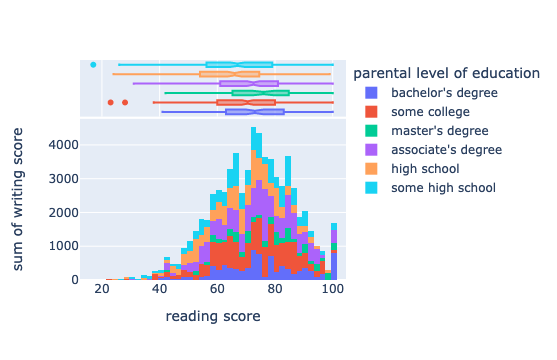

In [77]:
fig = px.histogram(df, 
                   x="reading score", 
                   y="writing score", 
                   color="parental level of education",
                   marginal="box",
                   hover_data=df.columns)
fig.show()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">BONUS</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

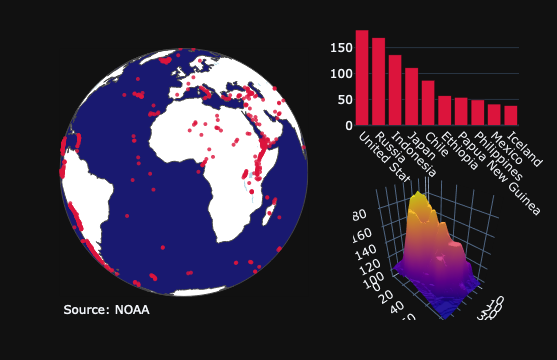

In [78]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

# read in volcano database data
df = pd.read_csv(
                "https://raw.githubusercontent.com/plotly/datasets/master/volcano_db.csv",
                encoding="iso-8859-1",
                )

# frequency of Country
freq = df
freq = freq.Country.value_counts().reset_index().rename(columns={"index": "x"})

# read in 3d volcano surface data
df_v = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "surface"}]])

# Add scattergeo globe map of volcano locations
fig.add_trace(
    go.Scattergeo(lat=df["Latitude"],
                  lon=df["Longitude"],
                  mode="markers",
                  hoverinfo="text",
                  showlegend=False,
                  marker=dict(color="crimson", size=4, opacity=0.8)),
    row=1, col=1
)

# Add locations bar chart
fig.add_trace(
              go.Bar(x=freq["x"][0:10],y=freq["Country"][0:10], marker=dict(color="crimson"), showlegend=False),
              row=1, col=2
              )

# Add 3d surface of volcano
fig.add_trace(
              go.Surface(z=df_v.values.tolist(), showscale=False),
              row=2, col=2
              )

# Update geo subplot properties
fig.update_geos(
                projection_type="orthographic",
                landcolor="white",
                oceancolor="MidnightBlue",
                showocean=True,
                lakecolor="LightBlue"
                )

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(
                  template="plotly_dark",
                  margin=dict(r=10, t=25, b=40, l=60),
                  annotations=[
                      dict(
                          text="Source: NOAA",
                          showarrow=False,
                          xref="paper",
                          yref="paper",
                          x=0,
                          y=0)
                              ]
                  )

fig.show()

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

___